I recently read an interesting explanation for covariance on [StackExchange Cross Validated](https://stats.stackexchange.com/questions/18058/how-would-you-explain-covariance-to-someone-who-understands-only-the-mean). The usage of rectangles and colors is very intuitive to see the directions, means, and strengths given information on covariance and correlation. It brings me to another (not very relevant) thought: I know Principal Component Analysis (PCA) involves a loosely ranking and selection of components based on their variances. Why don't I try implementing this by exploring the use of covariance matrix in this very popular dimension reduction/variable selection method.

**Note**: If you think I make any mistakes or unclear points, please let me know via email and we can discuss it, I really appreciate your help!



### Quick on PCA + SVD

SVD = Singular Value Decomposition

There seems to be many ways to construct PCA, here I am investigating sequentially the use of covariance matrix and then the use of SVD. A member of the basic linear transforms family, PCA+SVD is feature construction with the goal to transform data into a new coordinate system for dimensionality reduction or class separation. Basically, it reduces the number of features by getting linearly uncorrelated variables (or principal components, or eigenvectors) while maintaining variance. These variables belong to the left singular matrix of the SVD matrix while the variances are the middle matrix or diagonal matrix.

Principal components (PCs) are created (newly) from the data. Basically, PCA tries to convert the available into PCs that easier to read, contain useful information like variance and eigenvalues, but hard to be meaningfully interpreted because the measures or units are gone. Utilizing linear transforms, PCA finds weights as eigenvectors that maximizes variance or $||\mathbf{Xw}||^2$ (squared norm or squared length) of the projected data and thus gets these components through eigen-decomposition of the covariance matrix of the data. The resulting eigenvectors or PCs define the directions of maximum variance and eigenvalues quantify the amount of the PC's variance.

Note that these PCs are not features! Each PC is a direction of the data that is orthogonal to each other (no PCs or eigenvectors are overlapping) and represents the highest variance possible. For example, after finding the first PC with maximum variance, it essentially removes this PC from data, and find the next highest-variance PC. So, each PC contains "portions" of all features in original data [example](https://quanghieu31.github.io/posts/pca-covariance/#Bonus-PCA).

There are so many details on this supervised feature selection method (e.g. the relevance of nested subset methods, Gram-Schmidt orthogonalization,...) but I mainly try to see how relevant the covariance matrix is. 

Very helpful info on SVD: https://en.wikipedia.org/wiki/Singular_value_decomposition and PCA: https://en.wikipedia.org/wiki/Principal_component_analysis 



### 1. Covariance matrix

Suppose we have a data matrix called $\mathbf{X}$ that is standardized and centered to the mean 0 (for each column). And suppose it only has continous, numerical variables for convenience. $\mathbf{X}$ is $n \times p$ where $n$ is the number of observations and $p$ is the number of features. Now, the covariance matrix is

$$
\mathbf{C} = \frac{1}{n-1} (\mathbf{X}^T-\bar{\mathbf{X}^T}) (\mathbf{X}-\bar{\mathbf{X}}) =  \frac{1}{n-1} (\mathbf{X}^T) (\mathbf{X}) 
$$

The question now is why? Why does it look like this? Note that $\mathbf{X}$ contains multiple features/variables, so doing this means we simultaneously calculate the multiple cases of $Cov(\mathbf{X}, \mathbf{Y}) = \frac{1}{n-1} (\mathbf{X}-\bar{\mathbf{X}})(\mathbf{Y}-\bar{\mathbf{Y}})$. How to interpret the result of the covariance matrix? Each column and each row are the features themselves, the diagonal entries are the "self"-covariance while the rest show the covariance value between the intersected variables.

$\mathbf{C}$ is symmetric matrix and so it is diagonalizable: There exists a real orthogonal matrix $\mathbf{Q}$ and diagonal matrix $\mathbf{D}$ such that $$\mathbf{C} = \mathbf{Q}\mathbf{D}\mathbf{Q^T}$$

- $\mathbf{Q}$ contains all the eigenvectors of $\mathbf{C}$ which are the "principal directions", showing the direction in the feature space along which the data varies the most. 
- $\mathbf{D}$ represents the eigenvalues or how much variance along that corresponding principal direction. 

Proof: https://en.wikipedia.org/wiki/Symmetric_matrix

### 2. Transformed X

Projections of the data on the principal directions are called principal components, or PC scores; these can be seen as newly cretaed or transformed variables. So the transformed data is actually $\mathbf{X}\cdot\mathbf{Q}$

### 3. SVD

SVD factorizes $\mathbf{X}$ (not just square matrices) into three matrices ([proof](https://gregorygundersen.com/blog/2018/12/20/svd-proof/)):

$$
\mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T 
$$

where:

- $\mathbf{U}$ is a matrix of left singular vectors (related to the rows of $\mathbf{X}$),
- $\mathbf{\Sigma}$ is a diagonal matrix of singular values (related to the square roots of the eigenvalues), the diagnonal entries, $\sigma_i = \Sigma_{ii}$ are uniquely defined by $X$ and known as the singular values of $X$. These are non-negative real numbers. by convention the diagonal elements are in descending order.
- $\mathbf{V}^T$ is the transpose of a matrix of right singular vectors (related to the columns of $\mathbf{X}$).

### 4. Covariance matrix and SVD

Note that 

$$
\mathbf{C} = \frac{1}{n-1}(\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T)^T \cdot (\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T) = \mathbf{V} \frac{\mathbf{\Sigma}^2}{n-1} \mathbf{V}^T
$$

From the breakdown in part (1), it seems that $\mathbf{Q}$ is actually $\mathbf{V}$! So $V$ contains eigenvectors or principal directions of the covariance matrix $\mathbf{C}$. And $\frac{\mathbf{\Sigma}^2}{n-1}=\mathbf{D}$ represents how strong the variance of the corresponding directions are (the diagonal entries are eigenvalues). And the transformed data is $\mathbf{X}\cdot\mathbf{V} = (n\times p) \cdot (p\times p)$.

The $i$-th column of $\mathbf{X}\mathbf{V}$: This column represents the values of the $i$-th principal component for each sample. It is the transformed version of the original data in the direction of the $i$-th eigenvector.

Also, notice that $\mathbf{X}\mathbf{V}=\mathbf{U}\mathbf{\Sigma} \mathbf{V}^T \mathbf{V}=\mathbf{U}\mathbf{\Sigma}$.

### 5. Reduce dimensionality

Now, we would to have fewer features, i.e. $k<p$. 

- Get the initial $k$ columns from $\mathbf{U}$ or $n \times k$ matrix
- Get the initial $k$ columns and $k$ rows from $\mathbf{\Sigma}$ matrix or $k \times k$ matrix
- So, we have $\mathbf{U}_k \mathbf{\Sigma}_k$ which is $n\times k$ matrix that contains $k$ principle components or transformed features based on variance strength.

Lower rank (to be investigated later):

- Get the top $k$ rows of $V^T$
- Calculate $\mathbf{X}_k = \mathbf{U}_k \mathbf{\Sigma}_k \mathbf{V}^T_k $
- This matrix has lower rank (=$k$). 
- More on this: https://stats.stackexchange.com/questions/130721/what-norm-of-the-reconstruction-error-is-minimized-by-the-low-rank-approximation.

### 6. Try on a dataset

W. Wolberg. "Breast Cancer Wisconsin (Original)," UCI Machine Learning Repository, 1990. [Online]. Available: https://doi.org/10.24432/C5HP4Z.

In [ ]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
# impute `Bare_nuclei` variable (missing data) with mean
X['Bare_nuclei'] = X['Bare_nuclei'].fillna(X['Bare_nuclei'].mean())

In [126]:
# standardize and center data
X = X - X.mean()
X = (X-X.mean())/X.std()
# covariance matrix
C = (1/X.shape[0]) * X.T @ X
eigenvalues, eigenvectors = np.linalg.eigh(C)

print(eigenvalues)
print(eigenvectors)

[0.08852979 0.26196357 0.29494031 0.30549327 0.37923046 0.46220462
 0.53807087 0.77554845 5.88114313]
[[-0.00134     0.23175563 -0.01404671  0.27417447  0.06338653  0.10236355
   0.86285736  0.14244407  0.30267028]
 [-0.73455884 -0.45060332  0.19953745  0.09733398 -0.13692903 -0.20358348
  -0.01526165  0.04815858  0.38123865]
 [ 0.66617322 -0.59057132  0.12417806  0.01706757 -0.104332   -0.1718784
   0.03781563  0.08476065  0.37773738]
 [ 0.04718217  0.10055229 -0.12563921  0.67971233  0.01382596  0.46509141
  -0.4251162   0.04390685  0.3327405 ]
 [ 0.0672024   0.4547088  -0.17628399 -0.04258278 -0.67076873 -0.39246704
  -0.10609514 -0.16593569  0.33627742]
 [-0.07693108 -0.06962543 -0.38373562 -0.6040294  -0.12299572  0.53473612
  -0.00911322  0.25461852  0.33338425]
 [ 0.05987162  0.40268926  0.70482078 -0.25250951  0.251001    0.01098134
  -0.1953785   0.22944693  0.34609625]
 [-0.01841871  0.09428063 -0.48658454 -0.05095997  0.649491   -0.44754239
  -0.12547163 -0.02483507  0.33603

In [127]:
# Diagonalize the matrix C aka the covariance matrix
D = np.diag(eigenvalues)
V = eigenvectors

# verified: C = VDV^T indeed
diagonalization = V @ D @ V.T
np.round(C.to_numpy(), 3) == np.round(diagonalization, 3) # 3 decimal points

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [128]:
# principal components
# sort X based on eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1] # need to manually sort
eigenvalues_sorted = eigenvalues[sorted_indices]
V_sorted = V[:, sorted_indices]
column_names_sorted_by_eigenvalues = list(X.columns[sorted_indices])

pc_covariance = X.to_numpy() @ V_sorted  
# this new pc have columns that are projections of the original X in the principal directions (?)
pc_covariance = np.round(pc_covariance, 3)
print(pc_covariance)

[[-1.462  0.102  0.576 ...  0.339  0.422  0.004]
 [ 1.463  0.55  -0.3   ... -1.032  0.407 -0.026]
 [-1.584  0.071 -0.039 ...  0.242  0.238 -0.016]
 ...
 [ 3.818  0.167 -0.616 ...  0.691 -0.558  0.07 ]
 [ 2.264  1.106 -0.97  ...  1.706 -0.124 -0.402]
 [ 2.659  1.19  -1.062 ...  1.878 -0.362  0.084]]


In [129]:
# now, let's if we used the SVD method to get the same principal components or not
U, Sigma, Vt = np.linalg.svd(X)
# note that Sigma is already sorted descendingly
Sigma_matrix= np.zeros((X.shape[0], X.shape[1]))
np.fill_diagonal(Sigma_matrix, Sigma)
pc_svd = U @ Sigma_matrix
pc_svd = np.round(pc_svd, 3)
pc_svd

array([[ 1.462, -0.102,  0.576, ..., -0.339,  0.422,  0.004],
       [-1.463, -0.55 , -0.3  , ...,  1.032,  0.407, -0.026],
       [ 1.584, -0.071, -0.039, ..., -0.242,  0.238, -0.016],
       ...,
       [-3.818, -0.167, -0.616, ..., -0.691, -0.558,  0.07 ],
       [-2.264, -1.106, -0.97 , ..., -1.706, -0.124, -0.402],
       [-2.659, -1.19 , -1.062, ..., -1.878, -0.362,  0.084]])

In [130]:
# validate the both methods result in the same PC
pc_svd == pc_covariance

array([[False, False,  True, ..., False,  True,  True],
       [False, False,  True, ..., False,  True,  True],
       [False, False,  True, ..., False,  True,  True],
       ...,
       [False, False,  True, ..., False,  True,  True],
       [False, False,  True, ..., False,  True,  True],
       [False, False,  True, ..., False,  True,  True]])

In [131]:
# investigate why there are some differences in signs between two matrices
# TODO

In [132]:
# use the pc_svd to get fewer features
# original: 9 features, now: suppose we want 4 features
k = 4 
reconstructed_X = pc_svd[:, :k] 
reconstructed_X.shape

(699, 4)

In [133]:
# columns picked after PCA
column_names_sorted_by_eigenvalues[:k]

['Mitoses', 'Normal_nucleoli', 'Bland_chromatin', 'Bare_nuclei']

### Bonus-PCA

In [138]:
import numpy as np
import pandas as pd
np.random.seed(123)
random_matrix = np.random.randn(8, 3)
df = pd.DataFrame(random_matrix, columns=["feature1", "feature2", "feature3"])
print(df)

   feature1  feature2  feature3
0 -1.085631  0.997345  0.282978
1 -1.506295 -0.578600  1.651437
2 -2.426679 -0.428913  1.265936
3 -0.866740 -0.678886 -0.094709
4  1.491390 -0.638902 -0.443982
5 -0.434351  2.205930  2.186786
6  1.004054  0.386186  0.737369
7  1.490732 -0.935834  1.175829


In [135]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # suppose we want only 2 PCs
pca.fit(df)
eigenvectors = pca.components_
print("PCs:\n", eigenvectors) # each PC is a row!
print() 
eigenvalues = pca.explained_variance_
print("Eigenvalues:\n", eigenvalues)

PCs:
 [[ 0.91089251 -0.26571718 -0.31570433]
 [ 0.37939115  0.84018627  0.38749115]]

Eigenvalues:
 [2.35368466 1.27800638]


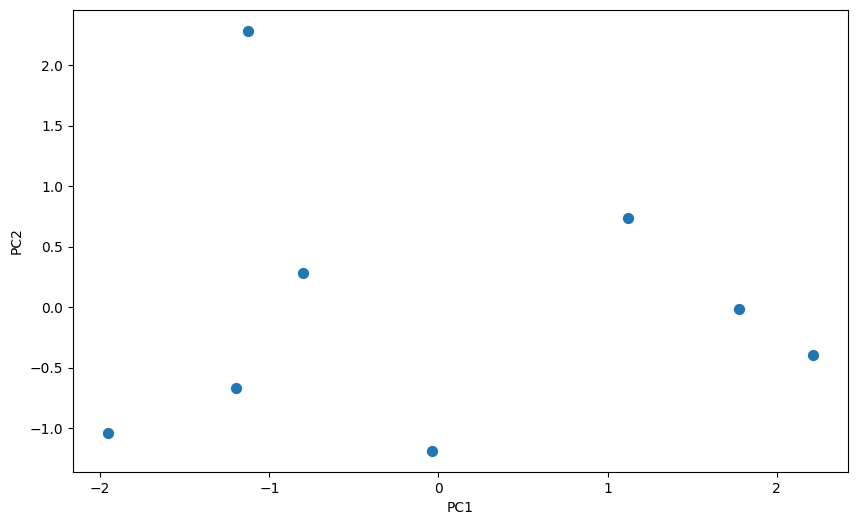

In [136]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

transformed_data = pca.transform(df)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], s=50)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

In [ ]:
![](/pca-covariance/fig-pca.png)

In [137]:
transformed_data

array([[-0.79980352,  0.28440197],
       [-1.19625559, -0.66901683],
       [-1.95269743, -1.04181503],
       [-0.03577698, -1.18725035],
       [ 2.21186851, -0.39434274],
       [-1.12874005,  2.28463639],
       [ 1.12261698,  0.73979447],
       [ 1.77878806, -0.01640788]])

This transformed data represents eight observations projected onto two PCs. Each row corresponds to an observation, and each column corresponds to a PC.

PC1 (more spread out given the center at 0) seems to capture the largest variance, as most of the observations have strong positive or negative values along this component.